<a href="https://colab.research.google.com/github/sadullahmath/Exercise/blob/master/RandomSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Search
Instead of searching through every hyperparameterizations in a pre-defined set, as is the case with a grid search, in a random search we sample from a distribution of possibilities by assuming each hyperparameter to be a random variable. Before we go through the process in depth, it will be helpful to briefly review what random variables are and what we mean by a distribution.

## Random Variables and Their Distributions
A random variable is non-constant (its value can change) and its variability can be described in terms of distribution. There are many different types of distributions, but each falls into one of two broad categories: discrete and continuous. We use discrete distributions to describe random variables whose values can take only whole numbers, such as counts.

An example is the count of visitors to a theme park in a day, or the number of attempted shots it takes a golfer to get a hole-in-one.

We use continuous distributions to describe random variables whose values lie along a continuum made up of infinitely small increments. Examples include human height or weight, or outside air temperature. Distributions often have parameters that control their shape.

Discrete distributions can be described mathematically using what's called a probability mass function, which defines the exact probability of the random variable taking a certain value. Common notation for the left-hand side of this function is P(X=x), which in plain English means that the probability that the random variable X equals a certain value x is P. Remember that probabilities range between 0 (impossible) and 1 (certain).

By definition, the summation of each P(X=x) for all possible x's will be equal to 1, or if expressed another way, the probability that X will take any value is 1. A simple example of this kind of distribution is the discrete uniform distribution, where the random variable X will take only one of a finite range of values and the probability it taking any particular value is the same for all values, hence the term uniform.

For example, if there are 10 possible values the probability that X is any particular value is exactly 1/10. If there were 6 possible values, as in the case of a standard 6-sided dice, the probability would be 1/6, and so on. The probability mass function for the discrete uniform distribution is:
Figure 8.15: Probability mass function for the discrete uniform distribution 
P(X=x)= 1/n  

The following code will allow us to see the form of this distribution with 10 possible values of X.

First, we create a list of all the possible values X can take:

In [1]:
# list of all xs
X = list(range(1, 11))

print(X)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [2]:
# pmf, 1/n * n = 1
p_X_x = [1/len(X)] * len(X)

# sums to 1
print(p_X_x)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


Text(0, 0.5, 'P(X=x)')

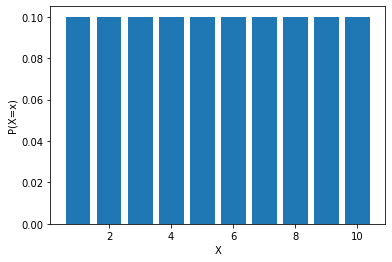

In [3]:
import matplotlib.pyplot as plt
plt.bar(X, p_X_x)
plt.xlabel('X')
plt.ylabel('P(X=x)')

In [0]:
import numpy as np

# range of xs
x = np.linspace(-10, 10, 100)

In [0]:
import scipy.stats as stats

# first normal distribution with mean = 0, variance = 1
p_X_1 = stats.norm.pdf(x=x, loc=0.0, scale=1.0**2)

# second normal distribution with mean = 0, variance = 2.25
p_X_2 = stats.norm.pdf(x=x, loc=0.0, scale=1.5**2)

Text(0, 0.5, 'P(X)')

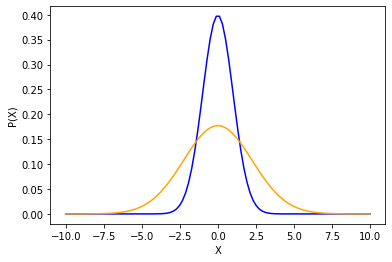

In [6]:
plt.plot(x,p_X_1, color='blue')
plt.plot(x, p_X_2, color='orange')
plt.xlabel('X')
plt.ylabel('P(X)')

#Simple Demonstration of the Random Search Process

In [0]:
from sklearn import datasets, linear_model, model_selection

# load the data
diabetes = datasets.load_diabetes()

# target
y = diabetes.target

# features
X = diabetes.data

In [10]:
# the first patient has index 0
print(y[0])

151.0


In [11]:
# let's look at the first patients data
print(
  dict(zip(diabetes.feature_names, X[0]))
)

{'age': 0.0380759064334241, 'sex': 0.0506801187398187, 'bmi': 0.0616962065186885, 'bp': 0.0218723549949558, 's1': -0.0442234984244464, 's2': -0.0348207628376986, 's3': -0.0434008456520269, 's4': -0.00259226199818282, 's5': 0.0199084208763183, 's6': -0.0176461251598052}


Text(0, 0.5, 'P(alpha)')

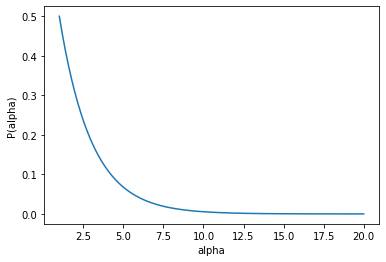

In [12]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# values of alpha
x = np.linspace(1, 20, 100)

# probabilities
p_X = stats.gamma.pdf(x=x, a=1, loc=1, scale=2)

plt.plot(x,p_X)
plt.xlabel('alpha')
plt.ylabel('P(alpha)')

In [0]:
# n sample values
n_iter = 100

# sample from the gamma distribution
samples = stats.gamma.rvs(a=1, loc=1, scale=2, size=n_iter, random_state=100)

Text(0, 0.5, 'sample count')

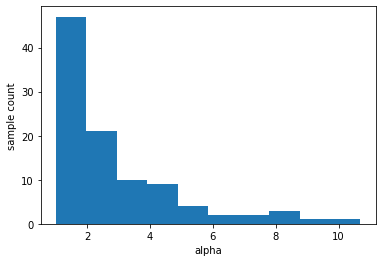

In [14]:
# visualize the sample distribution
plt.hist(samples)
plt.xlabel('alpha')
plt.ylabel('sample count')

In [0]:
# we will store the results inside a dictionary
result = {}

# for each sample
for sample in samples:

  # initialize a ridge regression estimator with alpha set to the sample value
  reg = linear_model.Ridge(alpha=sample)

  # conduct a 10-fold cross validation scoring on negative mean squared error
  cv = model_selection.cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')

  # retain the result in the dictionary
  result[sample] = [cv.mean()]

In [16]:
import pandas as pd

# convert the result dictionary to a pandas dataframe, transpose and reset the index
df_result = pd.DataFrame(result).T.reset_index()

# give the columns sensible names
df_result.columns = ['alpha', 'mean_neg_mean_squared_error']

print(df_result.sort_values('mean_neg_mean_squared_error', ascending=False).head())

       alpha  mean_neg_mean_squared_error
4   1.009460                 -3368.572167
26  1.011409                 -3369.403727
29  1.030745                 -3377.629026
43  1.041302                 -3382.102466
34  1.074316                 -3396.012056


Text(0, 0.5, '-MSE')

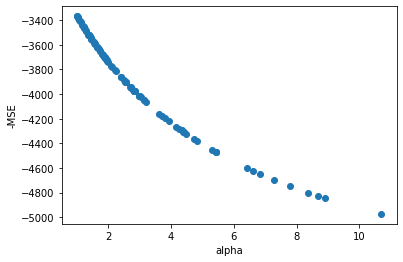

In [17]:
plt.scatter(df_result.alpha, df_result.mean_neg_mean_squared_error)
plt.xlabel('alpha')
plt.ylabel('-MSE')

# Tuning Using RandomizedSearchCV

In [0]:
from sklearn import datasets, model_selection, linear_model

# load the data
diabetes = datasets.load_diabetes()

# target
y = diabetes.target

# features
X = diabetes.data

# initialise the ridge regression
reg = linear_model.Ridge()

In [0]:
from scipy import stats

# alpha ~ gamma(1,1)
param_dist = {'alpha': stats.gamma(a=1, loc=1, scale=2)}

In [20]:
# set up the random search to sample 100 values and score on negative mean squared error
rscv = model_selection.RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error')

# start the search
rscv.fit(X,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb67e693320>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [21]:
import pandas as pd

# convert the results dictionary to a pandas data frame
results = pd.DataFrame(rscv.cv_results_)

# show the top 5 hyperparamaterizations
print(results.loc[:,['params','rank_test_score']].sort_values('rank_test_score').head(5))

                           params  rank_test_score
62  {'alpha': 1.0084495928006991}                1
58    {'alpha': 1.03909744356857}                2
45  {'alpha': 1.0438111449009713}                3
76   {'alpha': 1.059564459314748}                4
20  {'alpha': 1.0600386160325233}                5
